In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.integrate as integrate
from datetime import date
from datetime import timedelta
from scipy.stats import norm
from pandas_datareader import data

In [3]:
#historical prices for our stocks
tickers = ['CRC','IBE.MC','300750.SZ','SCCO','PUB.PA','KER.PA','CSCO','UNFI','EQNR','EBIX','ASML','SNPS','DE','WFG','BHP.AX','ANET','BP']
dataf = yf.download(tickers, start="2021-01-25",end="2023-01-25",ignore_tz=True)
prices = dataf['Adj Close']
prices.tail()


[*********************100%***********************]  17 of 17 completed


,300750.SZ,ANET,ASML,BHP.AX,BP,CRC,CSCO,DE,EBIX,EQNR,IBE.MC,KER.PA,PUB.PA,SCCO,SNPS,UNFI,WFG
Date,,,,,,,,,,,,,,,,,
2023-01-18,448.500000,115.000000,652.289978,49.080002,35.340000,45.490002,46.900002,425.989990,19.090000,30.809999,10.800,543.700012,62.160000,75.339996,335.660004,39.570000,72.860001
2023-01-19,446.769989,111.510002,630.250000,49.680000,35.540001,46.959999,46.459999,408.600006,18.540001,31.040001,10.805,530.000000,61.820000,76.160004,331.279999,38.770000,71.889999
2023-01-20,452.000000,115.129997,648.849976,49.950001,35.500000,47.320000,46.779999,410.600006,19.280001,31.309999,10.805,531.599976,62.180000,75.050003,342.420013,39.990002,74.510002
2023-01-23,NaN,119.160004,676.030029,49.400002,35.580002,47.189999,47.500000,409.339996,19.750000,31.080000,10.815,537.299988,62.240002,74.230003,350.329987,40.639999,74.559998
2023-01-24,NaN,121.769997,670.010010,49.709999,35.290001,47.200001,47.810001,416.670013,19.520000,30.580000,10.845,538.799988,64.080002,75.400002,349.279999,40.480000,78.169998


In [4]:
#market data over the same period
market_prices = yf.download("MSCI", start="2021-01-25", end="2023-01-25")["Adj Close"]
market_prices.tail()

[*********************100%***********************]  1 of 1 completed


Date
2023-01-18    506.339996
2023-01-19    495.790009
2023-01-20    511.760010
2023-01-23    514.979980
2023-01-24    519.840027
Name: Adj Close, dtype: float64

In [7]:
mcaps = data.get_quote_yahoo(tickers)['marketCap']
mcaps.to_dict()

{'CRC': 2995408384,
 'IBE.MC': 65621012480,
 '300750.SZ': 1114273087488,
 'SCCO': 58500321280,
 'PUB.PA': 18872479744,
 'KER.PA': 73206980608,
 'CSCO': 199776911360,
 'UNFI': 2590703872,
 'EQNR': 93011107840,
 'EBIX': 627349120,
 'ASML': 281905692672,
 'SNPS': 55089598464,
 'DE': 120663564288,
 'WFG': 7258801152,
 'BHP.AX': 343670882304,
 'ANET': 40551309312,
 'BP': 105969868800}

In [58]:
import pypfopt

In [59]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
print(delta)
S

1.506094167773588


,300750.SZ,ANET,ASML,BHP.AX,BP,CRC,CSCO,DE,EBIX,EQNR,IBE.MC,KER.PA,PUB.PA,SCCO,SNPS,UNFI,WFG
300750.SZ,0.232146,0.016343,0.021885,0.004962,0.005994,0.005041,0.000487,-0.001325,0.037466,0.006319,-0.006213,0.020198,0.009922,0.032983,0.018376,0.000106,0.003381
ANET,0.016343,0.148431,0.101918,-0.000217,0.020704,0.036498,0.049861,0.028652,0.122597,0.018019,0.014916,0.031013,0.020171,0.038755,0.080916,0.036240,0.040507
ASML,0.021885,0.101918,0.196789,-0.001036,0.036724,0.053864,0.054573,0.046734,0.160281,0.032804,0.020831,0.056307,0.042568,0.066610,0.112286,0.041436,0.059605
BHP.AX,0.004962,-0.000217,-0.001036,0.096303,0.012044,0.003699,-0.001148,0.005348,-0.028074,0.008551,-0.000809,0.010365,0.002183,0.016200,-0.008061,-0.007173,-0.001548
BP,0.005994,0.020704,0.036724,0.012044,0.111227,0.075699,0.017812,0.040316,0.053333,0.074932,0.004880,0.022414,0.024991,0.055459,0.011615,0.041078,0.037028
CRC,0.005041,0.036498,0.053864,0.003699,0.075699,0.200916,0.024046,0.036098,0.069469,0.079396,0.009371,0.022407,0.022942,0.059154,0.033740,0.061302,0.043015
CSCO,0.000487,0.049861,0.054573,-0.001148,0.017812,0.024046,0.065909,0.021221,0.059906,0.014127,0.011893,0.020851,0.016094,0.022146,0.034025,0.028726,0.029004
DE,-0.001325,0.028652,0.046734,0.005348,0.040316,0.036098,0.021221,0.104736,0.055096,0.040142,0.003896,0.021727,0.020329,0.053287,0.026513,0.039331,0.044022
EBIX,0.037466,0.122597,0.160281,-0.028074,0.053333,0.069469,0.059906,0.055096,0.763457,0.035355,0.030512,0.066041,0.059722,0.076209,0.112129,0.078830,0.112006
EQNR,0.006319,0.018019,0.032804,0.008551,0.074932,0.079396,0.014127,0.040142,0.035355,0.130790,-0.000991,0.014349,0.014555,0.056723,0.017140,0.030846,0.031889


In [60]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

300750.SZ    0.067833
ANET         0.094148
ASML         0.132992
BHP.AX       0.036915
BP           0.066733
CRC          0.073621
CSCO         0.063907
DE           0.067343
EBIX         0.129937
EQNR         0.065556
IBE.MC       0.037068
KER.PA       0.065140
PUB.PA       0.052796
SCCO         0.086175
SNPS         0.102834
UNFI         0.060244
WFG          0.069789
dtype: float64

In [113]:
viewdict = {
    'CRC': 0.19,
    'IBE.MC': 0.13,
    '300750.SZ': 0.12,
    'SCCO': 0.37,
    'PUB.PA': 0.1,
    'KER.PA': 0.1,
    'CSCO': 0.11,
    'UNFI': 0.48,
    'EQNR': 0.12,
    'EBIX': 0.28,
    'ASML': 0.04,
    'SNPS': 0.14,
    'DE': 0.25,
    'WFG': 0.25,
    'BHP.AX': 0.16,
    'ANET': 0.26,
    'BP': 0.1
}

horizondict = {
    'CRC': 3,
    'IBE.MC': 2,
    '300750.SZ': 3,
    'SCCO': 1,
    'PUB.PA': 3,
    'KER.PA': 2,
    'CSCO': 1,
    'UNFI': 1,
    'EQNR': 2,
    'EBIX': 5,
    'ASML': 5,
    'SNPS': 3,
    'DE': 5,
    'WFG': 5,
    'BHP.AX': 5,
    'ANET': 1,
    'BP': 1
}
    


other_analyst_views = {
    'CRC': 0.21,
    'IBE.MC': 0.02,
    '300750.SZ': 0.28,
    'SCCO': 0.30,
    'PUB.PA': 0.10,
    'KER.PA': 0.13,
    'CSCO': 0.10,
    'UNFI': 0.15,
    'EQNR': 0.21,
    'EBIX': -0.15,
    'ASML': 0.13,
    'SNPS': 0.16,
    'DE': 0.11,
    'WFG': 0.23,
    'BHP.AX': -0.1,
    'ANET': 0.32,
    'BP': 0.14
}

In [105]:
def confidence_calc(stock: str) -> float:
    
    mu = other_analyst_views[stock]
    sigma = (S[stock][stock])**0.5
    
    def normal_pdf(x):
        output = (sigma*(2*3.1415926)**0.5)**(-1)*np.power(2.718281828,-0.5*((x-mu)/sigma)**2)
        return(output)
    
    def normal_cdf(x):
        output = integrate.quad(normal_pdf,-1*np.inf,x)
        return(output)
       
    if viewdict[stock]>other_analyst_views[stock]:
        output = 2*(1-normal_cdf(viewdict[stock])[0])
    else:
        output = 2*normal_cdf(viewdict[stock])[0]
    return(output)

def yearly_stdv(stock):

    #Set out today's date and the year to date
    today = date.today()
    ytd = today - timedelta(days=365)

    print(ytd)
    data = yf.download(stock, start=ytd.strftime("%Y-%m-%d"), end=today.strftime("%Y-%m-%d"))
    prices = data['Adj Close']
    prices.tail()

    returns = prices.pct_change()
    stdev = returns.std()

    return stdev


def BS_Prob(stock):
    horizon = horizondict[stock]
    views = viewdict[stock]
    last_price = prices[stock].tail()[1]
    # Risk-free rate - needed under risk-neutral assumption
    r = 0.03
    # The calculation of the d2 parameter for the cdf function
    d2 = (np.log(last_price / views) + ((r - yearly_stdv(stock)**2 / 2) * horizon)) / (yearly_stdv(stock) * np.sqrt(horizon))
    # Calculation of the cumulative normal distribution function
    prob = norm.cdf(-d2)

    return prob



confidences = [0.5*confidence_calc(stock)+ 0.5* BS_Prob(stock) for stock in tickers]
confidences

 

2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***********************]  1 of 1 completed
2022-01-25
[*********************100%***

[0.4822053666772558,
 0.3224256068722582,
 0.36991550022155717,
 0.42748800385773633,
 0.5000000043067573,
 0.4624866107294726,
 0.484464440529194,
 0.2578949980572769,
 0.40173449496781005,
 0.3113152234001053,
 0.4196139031240164,
 0.4782293265885608,
 0.33265540052123665,
 0.48035437406048365,
 0.20106495318290996,
 0.4381205265363667,
 0.4522663555907569]

In [106]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

In [107]:
np.diag(bl.omega)

array([0.01078721, 0.00598438, 0.01977098, 0.00982205, 0.00392771,
       0.00589749, 0.00350682, 0.03710188, 0.00973866, 0.08444518,
       0.01360937, 0.00732012, 0.01050567, 0.00891483, 0.01913317,
       0.00951795, 0.00673528])

In [108]:
omega = bl.omega
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)
ret_bl = bl.bl_returns()
ret_bl

300750.SZ    0.086100
ANET         0.174656
ASML         0.185160
BHP.AX       0.053130
BP           0.125389
CRC          0.163461
CSCO         0.101035
DE           0.157650
EBIX         0.263317
EQNR         0.120516
IBE.MC       0.056421
KER.PA       0.104282
PUB.PA       0.088002
SCCO         0.224977
SNPS         0.145066
UNFI         0.194294
WFG          0.182355
dtype: float64

In [109]:
rets_df = pd.DataFrame([market_prior, pd.Series(viewdict), pd.Series(other_analyst_views), ret_bl], 
             index=["Prior", "Views", "Other Analysts' Views", "Posterior"]).T
rets_df


,Prior,Views,Other Analysts' Views,Posterior
300750.SZ,0.067833,0.12,0.28,0.086100
ANET,0.094148,0.26,0.32,0.174656
ASML,0.132992,0.04,0.13,0.185160
BHP.AX,0.036915,0.16,-0.10,0.053130
BP,0.066733,0.10,0.14,0.125389
CRC,0.073621,0.19,0.21,0.163461
CSCO,0.063907,0.11,0.10,0.101035
DE,0.067343,0.25,0.11,0.157650
EBIX,0.129937,0.28,-0.15,0.263317
EQNR,0.065556,0.12,0.21,0.120516


<AxesSubplot:>

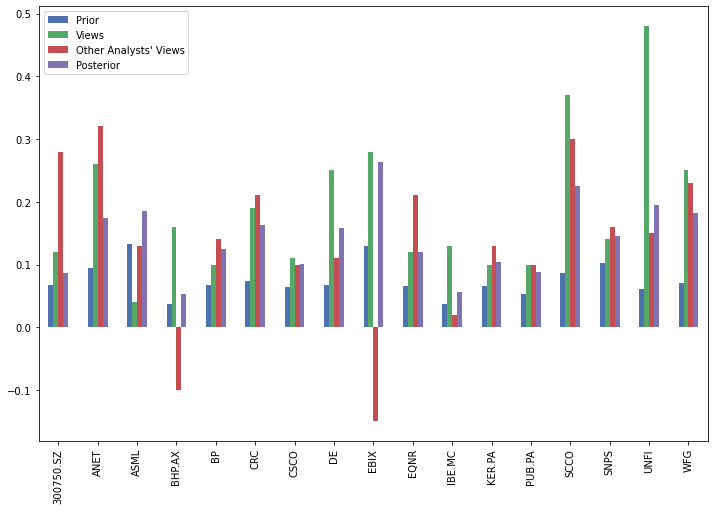

In [110]:
rets_df.plot.bar(figsize=(12,8))

In [111]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(ret_bl, S)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

C:\Users\samdo\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:257: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('300750.SZ', 0.03566),
             ('ANET', 0.0778),
             ('ASML', 0.06783),
             ('BHP.AX', 0.02534),
             ('BP', 0.0482),
             ('CRC', 0.06663),
             ('CSCO', 0.03887),
             ('DE', 0.07664),
             ('EBIX', 0.0767),
             ('EQNR', 0.04667),
             ('IBE.MC', 0.02068),
             ('KER.PA', 0.03878),
             ('PUB.PA', 0.03062),
             ('SCCO', 0.11691),
             ('SNPS', 0.05626),
             ('UNFI', 0.0919),
             ('WFG', 0.0845)])

<AxesSubplot:ylabel='None'>

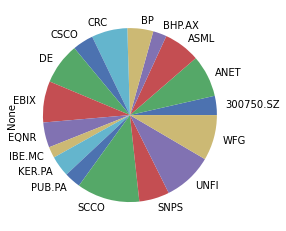

In [112]:
pd.Series(weights).plot.pie()

## What Has Changed?

### In our model:

 - We have added a component to the confidence calculation for each view which accounts for the volatility of each stock using a result of the Black-Scholes equation. The integration of this part is still under review. We plan to add results from surveys in investment committees to this calculation too.

### With your stock picks:

 - For most stocks which were also included in the first rebalancing, the views from other analysts have been updated. Why they have changed may be something to investigate. For those new to this rebalancing, are the views from other analysts what you expected? Bear in mind that some stocks have more analyst views for them available on Bloomberg than others. 
 
 - Other analysts' views from first rebalancing:
    California Resources Corporation: 0.42,
    Iberdrola: 0.10,
    Amperex: 0.41,
    Southern Copper: -0.17,
    Publicis: 0.11,
    Kering: 0.16,
    Cisco: 0.10,
    UNFI: 0.07,
    Equinor: 0.04
    
 - From second rebalancing:
    California Resources Corporation: 0.21,
    Iberdrola: 0.02,
    Amperex: 0.28,
    Southern Copper: 0.30,
    Publicis: 0.10,
    Kering: 0.13,
    Cisco: 0.10,
    UNFI: 0.15,
    Equinor: 0.21,
    EBIX: -0.15,
    ASML: 0.13,
    Synopsys: 0.16,
    John Deere: 0.11,
    West Fraser Timber: 0.23,
    BHP: -0.1,
    Arista: 0.32,
    BP: 0.14

